In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

%matplotlib inline  
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [2]:
def warmUpExercise():
    return(np.identity(5))

In [3]:
warmUpExercise()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [4]:
data=np.loadtxt('./data/ex1data1.txt',delimiter=',')

In [5]:
X=np.c_[data[:,0]]
y=np.c_[data[:,1]]
m=X.size

(4, 24)

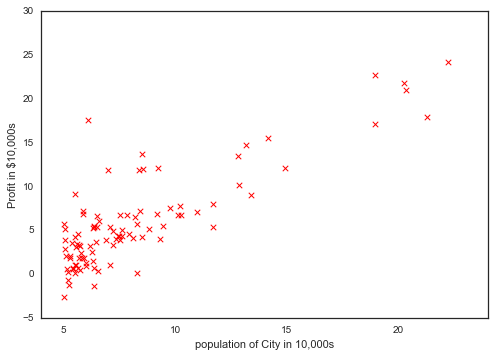

In [6]:
plt.scatter(X, y, s=30, c='r', marker='x', linewidths=1)
plt.xlabel('population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.xlim(4,24)

In [7]:
def computeCost(X,y,theta=[[0],[0]]):
    m=y.size
    X_extend=np.c_[np.ones(m),X]
    h=X_extend.dot(theta)                       
    J=np.sum(np.square(h-y))/(2*m)
    return(J)

In [8]:
computeCost(X,y)

32.072733877455676

In [9]:
def gradientDescent(X,y,theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m=y.size
    X_extend=np.c_[np.ones(m),X]
    J_history=np.zeros(num_iters)
    for i in range(num_iters):
        h=X_extend.dot(theta)
        theta = theta - alpha*(1/m)*(X_extend.T.dot(h-y))
        J_history[i] = computeCost(X,y,theta)
    return(theta,J_history)

In [10]:
theta,cost_J=gradientDescent(X,y)

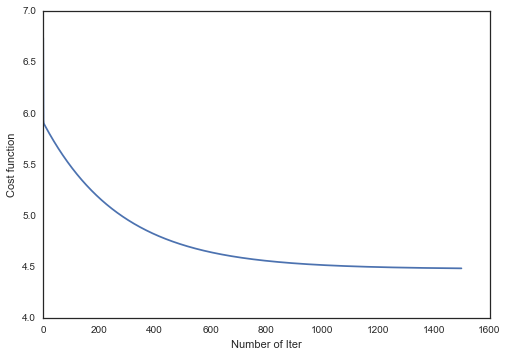

In [11]:
plt.plot(cost_J)
plt.xlabel('Number of Iter')
plt.ylabel('Cost function')

In [12]:
predict1=np.c_[1,3.5].dot(theta)
predict2=np.c_[1,7].dot(theta)

In [13]:
predict1

array([[ 0.45197679]])

In [14]:
predict2

array([[ 4.53424501]])

In [15]:
x_line=np.c_[np.ones(25), range(25)]
x_line
y_predict=x_line.dot(theta)

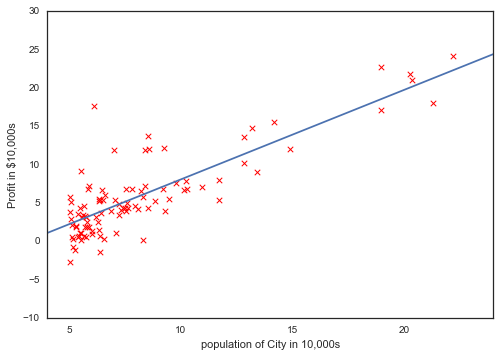

In [16]:
plt.scatter(X, y, s=30, c='r', marker='x', linewidths=1)
plt.xlabel('population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.xlim(4,24)
plt.plot(x_line[:,1],y_predict)

In [17]:
# Create grid coordinates for plotting
# numpy package is very similar to matlab
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

In [18]:
# a good way to avoid using nested for loop
# 2D enumerate to ergodic
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

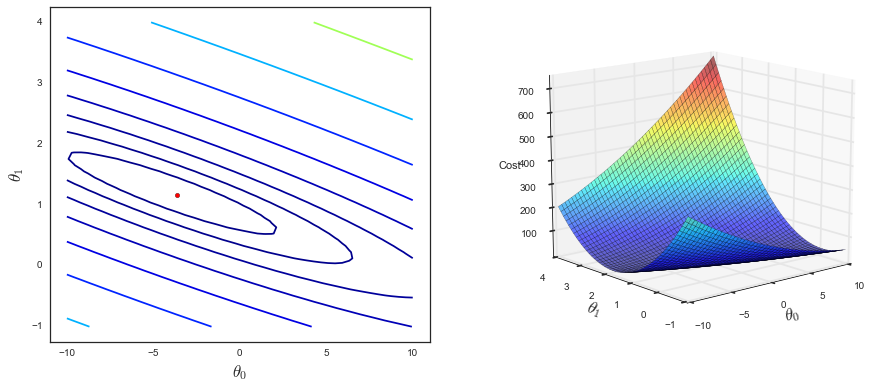

In [19]:
# similar to matlab figure
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# contour map similar to matlab
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# similar to matlab surf
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# the show of Greek letters is similar to matlab as well
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)